<a href="https://colab.research.google.com/github/dkbradley/201410-Audio/blob/master/stock_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @hidden_cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

Pull stock information by updating the filepath variable
Example: stockfile = 'stock.csv' (When it is in the same folder as this file)
This is configured to interpret stocks from a CSV file. Export available from Yahoo Finance.

In [ ]:
# @hidden_cell
stockfile = 'T.csv'

In [ ]:
# @hidden_cell
stock = pd.read_csv(stockfile)

In [ ]:
# @hidden_cell
DayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
stock['Date'] = pd.to_datetime(stock.Date)
stock['Weekday'] = stock.Date.dt.dayofweek
stock['Date'] = stock['Date'].dt.strftime('%m/%d/%Y')

In [ ]:
# @hidden_cell
stock['Difference'] = stock['Adj Close'] - stock['Open']
conditions = [
    (stock['Difference'] == 0),
    (stock['Difference'] < 0),
    (stock['Difference'] > 0)]
choices = ['Break', 'Loss', 'Gain']
stock['LossGain'] = np.select(conditions, choices, default='undefined')
#stock['LossGain'] = np.where(stock['Difference']<0, 'Loss', 'Gain')
pd.options.display.float_format = "{:,.2f}".format

Filename:  T.csv
Year To Date

Break Percentage:  0.40%  Breaks:  1
Loss Percentage:  91.27%  Losses:  230
Gain Percentage:  8.33%  Gains:   21
Total Percentage: 100.00% Total:  252

Average Per Day:  $-1.2
Average Loss: $-1.36
Average Gain: $0.28

Standard Deviation:  0.83
Frequency Loss:  13.53
Frequency Gain:  1.12

Start:  $32.42
Finish:  $30.20
Percentage Loss:  -6.84%

Thursday is the most common day for increase.
Wednesday is the most common day for loss.

Gains by weekday. Where 0 is Monday and 4 is Friday.


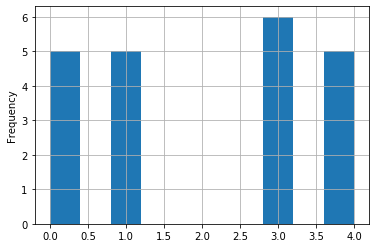

In [ ]:
# @hidden_cell

#Calculations
break_count = stock['LossGain'][stock.LossGain == 'Break'].count()
loss_count = stock['LossGain'][stock.LossGain == 'Loss'].count()
gain_count = stock['LossGain'][stock.LossGain == 'Gain'].count()
total = loss_count + gain_count + break_count
break_per = break_count / total
gain_per = gain_count / total
loss_per = loss_count / total

#Output information to the user
print('Filename: ', stockfile)
print('Year To Date')
print('')
print('Break Percentage: ', '{:.2%}'.format(break_per), ' Breaks: ', break_count)
print('Loss Percentage: ', '{:.2%}'.format(loss_per), ' Losses: ', loss_count)
print('Gain Percentage: ', '{:.2%}'.format(gain_per), ' Gains:  ', gain_count)
print('Total Percentage: 100.00%', 'Total: ', total)
print('')
print('Average Per Day: ', '${:.2}'.format(stock['Difference'].mean()))
print('Average Loss:', '${:1.2f}'.format(stock['Difference'][stock.LossGain == 'Loss'].mean()))
print('Average Gain:', '${:1.2f}'.format(stock['Difference'][stock.LossGain == 'Gain'].mean()))
print('')
print('Standard Deviation: ', '{:1.2f}'.format(stock['Difference'].std()))

#Calculate Frequency Gain
counter = 0
gain_list = []
gain_count = 0
for item in stock['LossGain']:
    if item == 'Gain':
        gain_count += 1
    else:
        if gain_count == 0:
            pass
        else:
            gain_list.append(gain_count)
            gain_count = 0
#Calculate Frequency Loss
counter = 0
loss_list = []
loss_count = 0
for item in stock['LossGain']:
    if item == 'Loss':
        loss_count += 1
    else:
        if loss_count == 0:
            pass
        else:
            loss_list.append(loss_count)
            loss_count = 0
            
df_gain = pd.DataFrame(gain_list)
df_loss = pd.DataFrame(loss_list)
print('Frequency Loss: ', "{:1.2f}".format(float(df_loss.mean())))
print('Frequency Gain: ', "{:1.2f}".format(float(df_gain.mean())))
print('')
print('Start: ', '${:1.2f}'.format(stock['Adj Close'][0]))
print('Finish: ', '${:1.2f}'.format(stock['Adj Close'].iloc[-1]))
percent_change = (stock['Adj Close'][0] - stock['Adj Close'].iloc[-1]) / stock['Adj Close'][0] * 100
if percent_change >= 0:
    percent_change *= -1
    print('Percentage Loss: ', '{:1.2f}%'.format(percent_change))
else:
    percent_change *= -1
    print('Percentage Gain: ', '{:1.2f}%'.format(percent_change))
print('')
common_gain_day = stock['Weekday'][stock.LossGain == 'Gain'].mode()[0]
if common_gain_day == 0:
    print('Monday is the most common day for increase.')
elif common_gain_day == 1:
    print('Tuesday is the most common day for increase.')
elif common_gain_day == 2:
    print('Wednesday is the most common day for increase.')
elif common_gain_day == 3:
    print('Thursday is the most common day for increase.')
elif common_gain_day == 4:
    print('Friday is the most common day for increase.')

common_loss_day = stock['Weekday'][stock.LossGain == 'Loss'].mode()[0]
if common_loss_day == 0:
    print('Monday is the most common day for loss.')
elif common_loss_day == 1:
    print('Tuesday is the most common day for loss.')
elif common_loss_day == 2:
    print('Wednesday is the most common day for loss.')
elif common_loss_day == 3:
    print('Thursday is the most common day for loss.')
elif common_loss_day == 4:
    print('Friday is the most common day for loss.')

print('')
print('Gains by weekday. Where 0 is Monday and 4 is Friday.')
stock['Weekday'][stock.LossGain == 'Gain'].plot.hist(grid=True);

Losses by weekday. Where 0 is Monday and 4 is Friday.


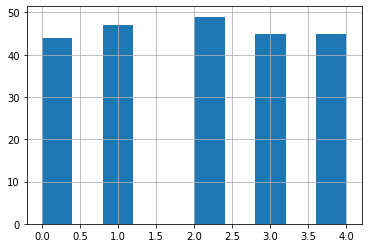

In [ ]:
# @hidden_cell
print('Losses by weekday. Where 0 is Monday and 4 is Friday.')
stock['Weekday'][stock.LossGain == 'Loss'].hist(grid=True);

In [ ]:
# @hidden_cell
stock7 = stock.iloc[-8:-1]
stock30 = stock.iloc[-30:]
stock7.reset_index(drop=True, inplace=True)
stock30.reset_index(drop=True, inplace=True)

Filename:  T.csv
Last 30 Days

Break Percentage:  3.33%  Breaks:  1
Loss Percentage:  56.67%  Losses:  17
Gain Percentage:  40.00%  Gains:   12
Total Percentage: 100.00% Total:  30

Average Per Day:  $-0.089
Average Loss: $-0.35
Average Gain: $0.27

Standard Deviation:  0.35
Frequency Loss:  2.12
Frequency Gain:  1.12

Start:  $29.40
Finish:  $30.20
Percentage Gain:  2.72%

Tuesday is the most common day for increase.
Monday is the most common day for loss.

Gains by weekday. Where 0 is Monday and 4 is Friday.


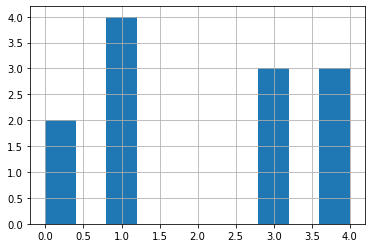

In [ ]:
# @hidden_cell

#Calculations
break_count = stock30['LossGain'][stock30.LossGain == 'Break'].count()
loss_count = stock30['LossGain'][stock30.LossGain == 'Loss'].count()
gain_count = stock30['LossGain'][stock30.LossGain == 'Gain'].count()
total = loss_count + gain_count + break_count
break_per = break_count / total
gain_per = gain_count / total
loss_per = loss_count / total

#Output information to the user
print('Filename: ', stockfile)
print('Last 30 Days')
print('')
print('Break Percentage: ', '{:.2%}'.format(break_per), ' Breaks: ', break_count)
print('Loss Percentage: ', '{:.2%}'.format(loss_per), ' Losses: ', loss_count)
print('Gain Percentage: ', '{:.2%}'.format(gain_per), ' Gains:  ', gain_count)
print('Total Percentage: 100.00%', 'Total: ', total)
print('')
print('Average Per Day: ', '${:.2}'.format(stock30['Difference'].mean()))
print('Average Loss:', '${:1.2f}'.format(stock30['Difference'][stock30.LossGain == 'Loss'].mean()))
print('Average Gain:', '${:1.2f}'.format(stock30['Difference'][stock30.LossGain == 'Gain'].mean()))
print('')
print('Standard Deviation: ', '{:1.2f}'.format(stock30['Difference'].std()))

#Calculate Frequency Gain
counter = 0
gain_list = []
gain_count = 0
for item in stock30['LossGain']:
    if item == 'Gain':
        gain_count += 1
    else:
        if gain_count == 0:
            pass
        else:
            gain_list.append(gain_count)
            gain_count = 0
#Calculate Frequency Loss
counter = 0
loss_list = []
loss_count = 0
for item in stock30['LossGain']:
    if item == 'Loss':
        loss_count += 1
    else:
        if loss_count == 0:
            pass
        else:
            loss_list.append(loss_count)
            loss_count = 0
            
df_gain = pd.DataFrame(gain_list)
df_loss = pd.DataFrame(loss_list)
print('Frequency Loss: ', "{:1.2f}".format(float(df_loss.mean())))
print('Frequency Gain: ', "{:1.2f}".format(float(df_gain.mean())))
print('')
print('Start: ', '${:1.2f}'.format(stock30['Adj Close'][0]))
print('Finish: ', '${:1.2f}'.format(stock30['Adj Close'].iloc[-1]))
percent_change = (stock30['Adj Close'][0] - stock30['Adj Close'].iloc[-1]) / stock30['Adj Close'][0] * 100
if percent_change >= 0:
    print('Percentage Loss: ', '{:1.2f}%'.format(percent_change))
else:
    percent_change *= -1
    print('Percentage Gain: ', '{:1.2f}%'.format(percent_change))
print('')
common_gain_day = stock30['Weekday'][stock30.LossGain == 'Gain'].mode()[0]
if common_gain_day == 0:
    print('Monday is the most common day for increase.')
elif common_gain_day == 1:
    print('Tuesday is the most common day for increase.')
elif common_gain_day == 2:
    print('Wednesday is the most common day for increase.')
elif common_gain_day == 3:
    print('Thursday is the most common day for increase.')
elif common_gain_day == 4:
    print('Friday is the most common day for increase.')

common_loss_day = stock30['Weekday'][stock30.LossGain == 'Loss'].mode()[0]
if common_loss_day == 0:
    print('Monday is the most common day for loss.')
elif common_loss_day == 1:
    print('Tuesday is the most common day for loss.')
elif common_loss_day == 2:
    print('Wednesday is the most common day for loss.')
elif common_loss_day == 3:
    print('Thursday is the most common day for loss.')
elif common_loss_day == 4:
    print('Friday is the most common day for loss.')

print('')
print('Gains by weekday. Where 0 is Monday and 4 is Friday.')
gain_chart = stock30['Weekday'][stock30.LossGain == 'Gain'].hist(grid=True);
gain_chart;

Losses by weekday. Where 0 is Monday and 4 is Friday.


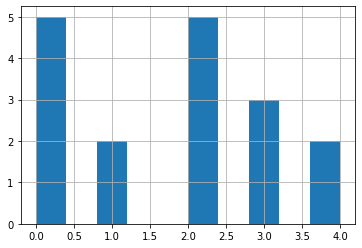

In [ ]:
print('Losses by weekday. Where 0 is Monday and 4 is Friday.')
loss_chart = stock30['Weekday'][stock30.LossGain == 'Loss'].hist(grid=True);
loss_chart;